# PET Bottle Defect and Component Classification
## Part 1: Loading and Extracting Features from Images
This section covers:
- Importing necessary libraries for image processing and feature extraction.
- Defining functions to extract HOG (Histogram of Oriented Gradients) features from images.
- Loading images from directories, preprocessing them (resizing and grayscale conversion), and extracting HOG features.
- Combining features and labels from training, validation, and test datasets into a unified dataset.
- Visualizing the class distribution across the dataset using a bar plot.
- Saving the extracted features and labels into .npy and .csv files for future use.


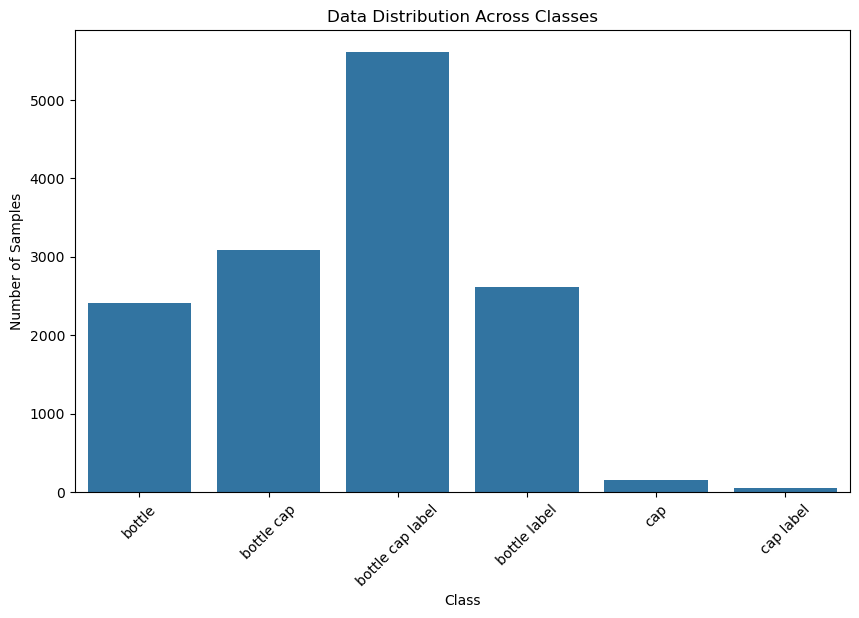

Combined features saved to C:\Users\sgshi\OneDrive\Documents\E\Data Science Project\Extracted Features\combined_features.npy
Combined features saved to C:\Users\sgshi\OneDrive\Documents\E\Data Science Project\Extracted Features\combined_features.csv


In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from skimage import io, color, transform
from skimage.feature import hog

# Function to extract HOG features from an image
def extract_hog_features(image):
    resized_image = transform.resize(image, (128, 128))  # Resize image
    gray_image = color.rgb2gray(resized_image)  # Convert to grayscale
    features, _ = hog(gray_image, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=True)
    return features

# Function to load images and extract features
def load_images_and_extract_features(image_folder):
    features = []
    labels = []
    for class_name in os.listdir(image_folder):
        class_folder = os.path.join(image_folder, class_name)
        if not os.path.isdir(class_folder):  # Skip if not a directory
            continue
        for image_name in os.listdir(class_folder):
            image_path = os.path.join(class_folder, image_name)
            try:
                image = io.imread(image_path)
                hog_features = extract_hog_features(image)
                features.append(hog_features)
                labels.append(class_name)
            except Exception as e:
                print(f"Error processing {image_path}: {e}")
    return np.array(features), np.array(labels)

# Define paths to train, validation, and test folders
train_folder = r"C:\Users\sgshi\OneDrive\Documents\E\Data Science Project\Datasets\Classifcation PET-Bottle.v1-01.folder\train"
valid_folder = r"C:\Users\sgshi\OneDrive\Documents\E\Data Science Project\Datasets\Classifcation PET-Bottle.v1-01.folder\valid"
test_folder = r"C:\Users\sgshi\OneDrive\Documents\E\Data Science Project\Datasets\Classifcation PET-Bottle.v1-01.folder\test"

# Load and extract features from train, validation, and test datasets
X_train, y_train = load_images_and_extract_features(train_folder)
X_valid, y_valid = load_images_and_extract_features(valid_folder)
X_test, y_test = load_images_and_extract_features(test_folder)

# Combine all datasets into one
X_all = np.concatenate((X_train, X_valid, X_test))
y_all = np.concatenate((y_train, y_valid, y_test))

# Count the number of samples per class
class_counts = {class_name: np.sum(y_all == class_name) for class_name in np.unique(y_all)}

# Plot the data distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()))
plt.title("Data Distribution Across Classes")
plt.xlabel("Class")
plt.ylabel("Number of Samples")
plt.xticks(rotation=45)
plt.show()

# Save combined dataset to a file
def save_features_to_file(X, y, filename="combined_features.npy"):
    # Save features and labels as a dictionary
    data = {"features": X, "labels": y}
    np.save(filename, data)
    print(f"Combined features saved to {filename}")

# Save combined dataset to a file
save_features_to_file(X_all, y_all, filename=r"C:\Users\sgshi\OneDrive\Documents\E\Data Science Project\Extracted Features\combined_features.npy")

# Optional: Save to CSV for readability
def save_features_to_csv(X, y, filename="combined_features.csv"):
    df = pd.DataFrame(X)
    df["Label"] = y
    df.to_csv(filename, index=False)
    print(f"Combined features saved to {filename}")

save_features_to_csv(X_all, y_all, filename=r"C:\Users\sgshi\OneDrive\Documents\E\Data Science Project\Extracted Features\combined_features.csv")

## Part 2: Classification Using Random Forest and SVM
This section describes:
- Training two classifiers, Random Forest and SVM, on the extracted HOG features.
- Evaluating the classifiers on both validation and test datasets.
- Reporting accuracy and detailed classification metrics like precision, recall, and F1-score for both models.

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

# Train SVM
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Evaluate Random Forest on Validation Data
rf_valid_predictions = rf_model.predict(X_valid)
print("Random Forest Validation Accuracy:", accuracy_score(y_valid, rf_valid_predictions))
print("Random Forest Validation Classification Report:")
print(classification_report(y_valid, rf_valid_predictions))

# Evaluate Random Forest on Test Data
rf_test_predictions = rf_model.predict(X_test)
print("Random Forest Test Accuracy:", accuracy_score(y_test, rf_test_predictions))
print("Random Forest Test Classification Report:")
print(classification_report(y_test, rf_test_predictions))

# Evaluate SVM on Validation Data
svm_valid_predictions = svm_model.predict(X_valid)
print("SVM Validation Accuracy:", accuracy_score(y_valid, svm_valid_predictions))
print("SVM Validation Classification Report:")
print(classification_report(y_valid, svm_valid_predictions))

# Evaluate SVM on Test Data
svm_test_predictions = svm_model.predict(X_test)
print("SVM Test Accuracy:", accuracy_score(y_test, svm_test_predictions))
print("SVM Test Classification Report:")
print(classification_report(y_test, svm_test_predictions))


Random Forest Validation Accuracy: 0.74
Random Forest Validation Classification Report:
                  precision    recall  f1-score   support

          bottle       0.87      0.57      0.68        69
      bottle cap       0.76      0.80      0.78       109
bottle cap label       0.65      0.87      0.74       141
    bottle label       0.88      0.62      0.73        73
             cap       1.00      0.43      0.60         7
       cap label       0.00      0.00      0.00         1

        accuracy                           0.74       400
       macro avg       0.69      0.55      0.59       400
    weighted avg       0.77      0.74      0.74       400

Random Forest Test Accuracy: 0.6567164179104478
Random Forest Test Classification Report:
                  precision    recall  f1-score   support

          bottle       0.86      0.29      0.43        42
      bottle cap       0.62      0.63      0.63        49
bottle cap label       0.63      0.93      0.75        74
    bo

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


SVM Validation Accuracy: 0.615
SVM Validation Classification Report:
                  precision    recall  f1-score   support

          bottle       0.61      0.49      0.54        69
      bottle cap       0.68      0.66      0.67       109
bottle cap label       0.57      0.74      0.65       141
    bottle label       0.60      0.42      0.50        73
             cap       1.00      0.57      0.73         7
       cap label       1.00      1.00      1.00         1

        accuracy                           0.61       400
       macro avg       0.74      0.65      0.68       400
    weighted avg       0.62      0.61      0.61       400

SVM Test Accuracy: 0.5572139303482587
SVM Test Classification Report:
                  precision    recall  f1-score   support

          bottle       0.56      0.24      0.33        42
      bottle cap       0.61      0.51      0.56        49
bottle cap label       0.54      0.85      0.66        74
    bottle label       0.52      0.35      0.

## Part 3: Installing Required Libraries
This part focuses on installing necessary Python libraries such as Py_FS and ReliefF.
- Py_FS is a Python library for feature selection using metaheuristic algorithms.
- ReliefF is a feature selection algorithm based on feature importance.

In [5]:
!pip install -U Py_FS

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/9.5 MB ? eta -:--:--
   --- ------------------------------------ 0.8/9.5 MB 4.8 MB/s eta 0:00:02
   ------- -------------------------------- 1.8/9.5 MB 5.3 MB/s eta 0:00:02
   ----------- ---------------------------- 2.6/9.5 MB 4.9 MB/s eta 0:00:02
   --------------- ------------------------ 3.7/9.5 MB 4.5 MB/s eta 0:00:02
   ----------------- ---------------------- 4.2/9.5 MB 4.5 MB/s eta 0:00:02
   ------------------- -------------------- 4.7/9.5 MB 4.0 MB/s eta 0:00:02
   ----------------------- ---------------- 5.5/9.5 MB 3.9 MB/s eta 0:00:02
   -------------------------- ------------- 6.3/9.5 MB 4.0 MB/s eta 0:00:01
   ---------------------------- ----------- 6.8/9.5 MB 3.8 MB/s eta 0:00:01
   -------------------------------- ------- 7.6/9.5 MB 3.7 MB/s eta 0:00:01
   ---------------------------------- ----- 8.1/9.5 MB 3.6 MB/s eta 0:00:01
   --------------

In [3]:
!pip install ReliefF
!pip install -U Py_FS

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


## Part 4: Loading Extracted Features from a CSV File
This section covers:
- Loading the previously saved extracted features and labels from a CSV file using pandas.
- This data will be used for further analysis and feature selection.

In [4]:
import imblearn
print(imblearn.__version__)

0.12.3


In [5]:
from sklearn import datasets
from Py_FS.datasets import get_dataset
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import io

In [8]:
file_path = r"C:\Users\sgshi\OneDrive\Documents\E\Data Science Project\Extracted Features\combined_features.csv"

# Read the Excel file
df = pd.read_csv(file_path)

## Part 5: Data Distribution Analysis
This section explains:
- Splitting the data into input features (X) and target labels (y).
- Encoding categorical labels into numerical values using LabelEncoder.
- Visualizing the class distribution to identify imbalances in the dataset.

Class=0, n=2415 (17.329%)
Class=1, n=3083 (22.123%)
Class=2, n=5609 (40.248%)
Class=3, n=2612 (18.743%)
Class=4, n=161 (1.155%)
Class=5, n=56 (0.402%)


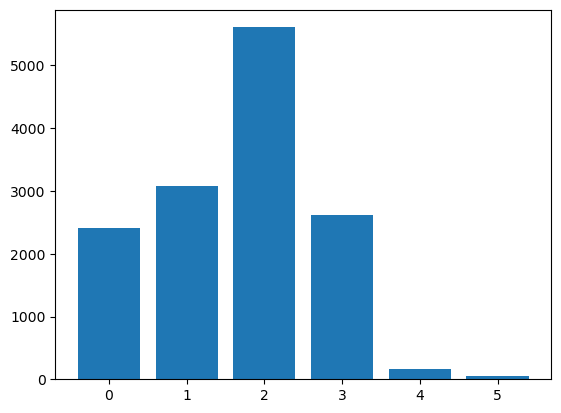

In [9]:
from pandas import read_csv
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
import numpy as np
data = df.values
# split into input and output elements
X = data[:, :-1]
y = data[:,-1]

y = LabelEncoder().fit_transform(y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

## Part 6: Handling Imbalanced Data Using SMOTE
This section discusses:
- Using SMOTE (Synthetic Minority Over-sampling Technique) to balance the dataset by oversampling minority classes.
- Visualizing the updated class distribution after applying SMOTE.

## Synthetic Minority Oversampling Technique(SMOTE)
SMOTE is a popular oversampling technique used to address the class imbalance problem in machine learning datasets. When the dataset has significantly fewer samples in one class (the minority class) compared to others (majority class), it can lead to biased models that perform poorly on the minority class. SMOTE helps mitigate this by generating synthetic samples for the minority class.

How SMOTE Works:
- Identify Nearest Neighbors: For each instance in the minority class, SMOTE identifies its k-nearest neighbors (default is 5).
- Generate Synthetic Samples: Synthetic data points are created by interpolating between the instance and its neighbors. The new sample is placed - randomly on the line segment joining the two points in feature space.
- Increase Minority Class Samples: This process is repeated until the minority class has sufficient samples to balance the dataset.

C:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreatePro

Class=0, n=5609 (16.667%)
Class=1, n=5609 (16.667%)
Class=2, n=5609 (16.667%)
Class=3, n=5609 (16.667%)
Class=4, n=5609 (16.667%)
Class=5, n=5609 (16.667%)


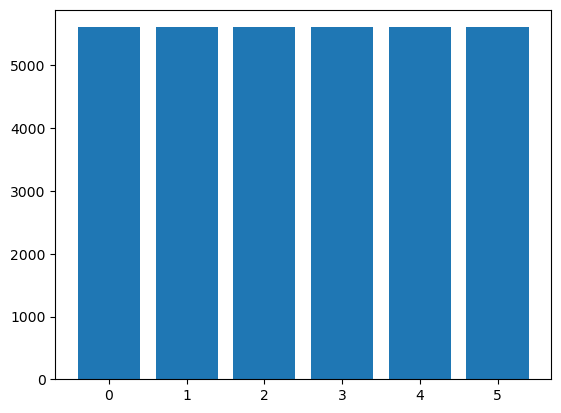

In [10]:
from pandas import read_csv
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

## Part 7: Feature Selection Using PCC (Pearson Correlation Coefficient)
This section highlights:
- Using Py_FS to perform feature selection based on PCC, which evaluates the relationship between features and the target variable.
- Specifying algorithm parameters such as weights for feature-class and feature-feature relationships.

In [11]:
data = X
target = y

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
target = le.fit_transform(target)

## Filter methods
Options: (The exact term to be imported is mentioned inside parentheses)
* Pearson Correlation Coefficient (PCC)
* Spearman Correlation Coefficient (SCC)
* Relief
* Mutual Information (MI)

Solution contains 3 properties:
* **scores**: scores provided to the features
* **ranks**: ranks of the features
* **ranked_features**: the feature values after ordering them according to ranks 

In [ ]:
from Py_FS.filter import PCC as FS
algo_params = {
    "weight_class": 0.5,  # Adjust this based on your use case
    "weight_feat": 0.5    # Adjust this based on your use case
}
solution = FS(data, target, verbose = True)


## Part 8: Executing the PCC Feature Selection Algorithm
This part explains:
- Initializing and executing the PCC feature selection algorithm.
- Accessing the feature scores, ranks, and reordered feature matrix based on importance.
- Printing the scores and verifying the shape of the ranked feature matrix.

In [16]:
solution.algo_params = {
    "weight_class": 0.5,  # Weight for feature-class relationship
    "weight_feat": 0.5    # Weight for feature-feature relationship
}

# Execute the feature selection
solution.initialize()
solution.execute()

# Access the results
scores = solution.feature_scores  # Scores for each feature
ranks = np.argsort(scores)[::-1]
ranked_features = data[:, ranks]  # Feature matrix reordered by rank

# Print results
print("Scores:", scores)
print("Ranks:", ranks)
print("Ranked Features Shape:", ranked_features.shape)

Scores: [0.09222421 0.36862247 0.27041182 0.15993071 0.11435023 0.29093704
 0.38367026 0.39716016 0.42860457 0.22475165 0.2320726  0.30289618
 0.41047938 0.25690116 0.3233765  0.26099263 0.24053938 0.27020289
 0.23100634 0.22530442 0.33010807 0.30987192 0.19388894 0.27768748
 0.28111062 0.25444601 0.21918445 0.37104801 0.36400953 0.34325094
 0.48343612 0.38422157 0.42553224 0.3337209  0.29718708 0.40295149
 0.40622065 0.35804251 0.30105877 0.34404952 0.44729427 0.52448289
 0.38349852 0.38393498 0.45128368 0.21331623 0.22094675 0.19805737
 0.26278591 0.28882084 0.36785131 0.37977168 0.23400447 0.25206223
 0.26157821 0.29982385 0.2504394  0.21240742 0.29518424 0.39742663
 0.22712206 0.15183154 0.18711877 0.17847013 0.39099828 0.43306168
 0.30558143 0.16480396 0.23200868 0.25207805 0.2676215  0.04506024
 0.20014669 0.37156376 0.18520468 0.14603323 0.14275548 0.1677999
 0.18147565 0.20425759 0.40860084 0.44200588 0.48621389 0.49598542
 0.47666309 0.39137997 0.32886301 0.35570881 0.43702951

## Part 9: Feature Selection Using BBA (Binary Bat Algorithm)
This section describes:
- Using the BBA algorithm for feature selection, which is a metaheuristic inspired by bat echolocation behavior.
- Saving the results of the selected features into a file for future use.

Weight for the classification accuracy [0-1]:  0.5
Enter the percentage of data wanted for valdiation [0, 100]:  50



                          Iteration - 1


Number of agents: 30

------------- Best Agent ---------------
Fitness: 0.733049779867673
Number of Features: 173
----------------------------------------

Bat 1 - Fitness: 0.733049779867673, Number of Features: 173
Bat 2 - Fitness: 0.7295882361680632, Number of Features: 180
Bat 3 - Fitness: 0.7101811820288821, Number of Features: 204
Bat 4 - Fitness: 0.7091475319922347, Number of Features: 203
Bat 5 - Fitness: 0.7050322769953051, Number of Features: 210
Bat 6 - Fitness: 0.6981048562825618, Number of Features: 220
Bat 7 - Fitness: 0.6949785253362651, Number of Features: 221
Bat 8 - Fitness: 0.6860943040450862, Number of Features: 235
Bat 9 - Fitness: 0.6846212869693549, Number of Features: 233
Bat 10 - Fitness: 0.6828491164992769, Number of Features: 236
Bat 11 - Fitness: 0.6804890082407242, Number of Features: 238
Bat 12 - Fitness: 0.6801134028149205, Number of Features: 241
Bat 13 - Fitness: 0.6700299370060023, Number of Features: 252
Bat 1

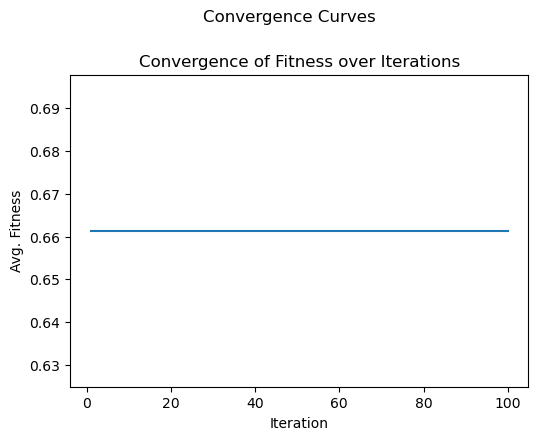

Solution saved to C:\Users\sgshi\OneDrive\Documents\E\Data Science Project\Extracted Features\bba_solution.pkl


In [17]:
from Py_FS.wrapper.nature_inspired.BBA import BBA as FS
import pickle
import os

# Define the directory and file path
save_directory = r"C:\Users\sgshi\OneDrive\Documents\E\Data Science Project\Extracted Features"
file_name = "bba_solution.pkl"
file_path = os.path.join(save_directory, file_name)

# Run the BBA algorithm
solution = FS(num_agents=30, max_iter=100, train_data=data, train_label=target, save_conv_graph=True)

# Save the solution (selected features or other results) to a file
with open(file_path, 'wb') as f:
    pickle.dump(solution, f)

print(f"Solution saved to {file_path}")

## Part 10: Model Evaluation with Selected Features
This final section explains:
- Evaluating the selected features using classifiers such as Random Forest and SVM.
- Calculating evaluation metrics like accuracy, recall, precision, F1-score, and confusion matrix.
- Splitting the dataset into training and testing sets for model evaluation.

In [18]:
solution.best_agent

array([0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
       1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1.,
       1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
       0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0.,
       0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0.,
       0., 0., 0., 0., 0.

In [19]:
solution.best_fitness

0.733049779867673

In [20]:
solution.best_accuracy

0.7664467819575682

In [21]:
solution.final_population

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 1., 0., ..., 0., 1., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [1., 0., 0., ..., 1., 1., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 1., 0., 0.]])

In [22]:
solution.final_fitness

array([0.73304978, 0.72958824, 0.71018118, 0.70914753, 0.70503228,
       0.69810486, 0.69497853, 0.6860943 , 0.68462129, 0.68284912,
       0.68048901, 0.6801134 , 0.67002994, 0.66929343, 0.66683783,
       0.66379863, 0.66056614, 0.65966837, 0.65607527, 0.65375757,
       0.6396076 , 0.63457755, 0.63234698, 0.62013477, 0.61841135,
       0.60731559, 0.59916556, 0.5982975 , 0.59804075, 0.59790487])

In [23]:
solution.final_accuracy

array([0.78017472, 0.77916444, 0.77898615, 0.7788673 , 0.77862958,
       0.77815416, 0.77767873, 0.77755987, 0.77684673, 0.77672788,
       0.77542046, 0.77464789, 0.77464789, 0.77452903, 0.77452903,
       0.77435075, 0.77417246, 0.77393475, 0.77375646, 0.77363761,
       0.77328104, 0.77298389, 0.77298389, 0.77262733, 0.77227076,
       0.77167647, 0.77078505, 0.77072562, 0.77072562, 0.76644678])

In [24]:
solution.convergence_curve

{'fitness': array([0.66133597, 0.66133597, 0.66133597, 0.66133597, 0.66133597,
        0.66133597, 0.66133597, 0.66133597, 0.66133597, 0.66133597,
        0.66133597, 0.66133597, 0.66133597, 0.66133597, 0.66133597,
        0.66133597, 0.66133597, 0.66133597, 0.66133597, 0.66133597,
        0.66133597, 0.66133597, 0.66133597, 0.66133597, 0.66133597,
        0.66133597, 0.66133597, 0.66133597, 0.66133597, 0.66133597,
        0.66133597, 0.66133597, 0.66133597, 0.66133597, 0.66133597,
        0.66133597, 0.66133597, 0.66133597, 0.66133597, 0.66133597,
        0.66133597, 0.66133597, 0.66133597, 0.66133597, 0.66133597,
        0.66133597, 0.66133597, 0.66133597, 0.66133597, 0.66133597,
        0.66133597, 0.66133597, 0.66133597, 0.66133597, 0.66133597,
        0.66133597, 0.66133597, 0.66133597, 0.66133597, 0.66133597,
        0.66133597, 0.66133597, 0.66133597, 0.66133597, 0.66133597,
        0.66133597, 0.66133597, 0.66133597, 0.66133597, 0.66133597,
        0.66133597, 0.66133597, 0.661

In [25]:
solution.execution_time

14257.591784238815

In [26]:
train_X, test_X, train_Y, test_Y = train_test_split(data, target, stratify=target, test_size=0.2, random_state=2)

In [27]:
from  Py_FS.evaluation import evaluate

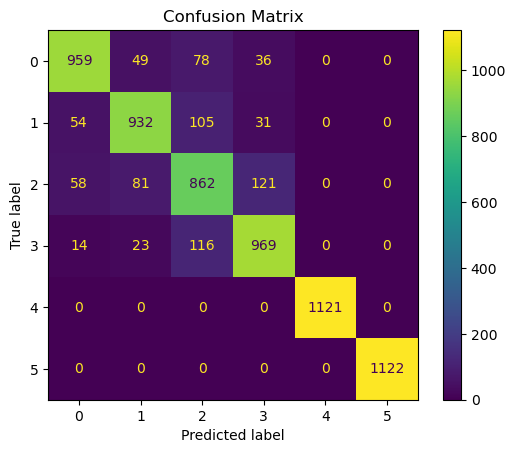

In [28]:
result = evaluate(train_X, test_X, train_Y, test_Y, agent=solution.best_agent, classifier='rf', save_conf_mat=True,averaging='weighted')

In [29]:
test_Y

array([4, 3, 3, ..., 5, 0, 5], dtype=int64)

In [30]:
result.predictions

array([4, 2, 3, ..., 5, 0, 5], dtype=int64)

In [31]:
result.accuracy

0.8861981874907146

In [32]:
result.recall

0.8861981874907146

In [33]:
result.precision

0.8871217893034008

In [34]:
train_X, test_X, train_Y, test_Y = train_test_split(data, target, stratify=target, test_size=0.2, random_state=2)

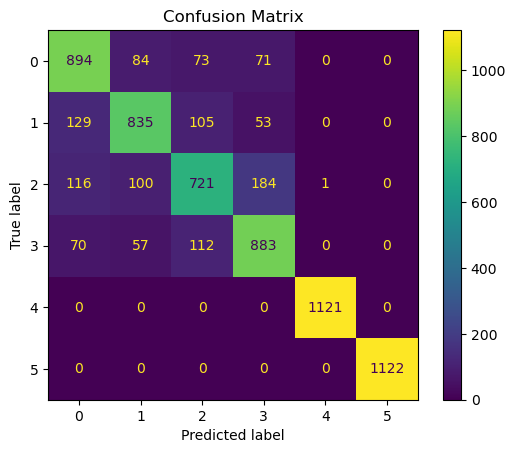

In [35]:
result = evaluate(train_X, test_X, train_Y, test_Y, agent=solution.best_agent, classifier='svm', save_conf_mat=True,averaging='weighted')

In [36]:
test_Y

array([4, 3, 3, ..., 5, 0, 5], dtype=int64)

In [37]:
result.predictions

array([4, 1, 3, ..., 5, 0, 5], dtype=int64)

In [38]:
result.accuracy

0.8284058832268608

In [39]:
result.recall

0.8284058832268608

In [40]:
result.precision

0.8281636424288393

In [41]:
result.f1_score

0.8276315084204461

In [42]:
result.confusion_matrix

array([[ 894,   84,   73,   71,    0,    0],
       [ 129,  835,  105,   53,    0,    0],
       [ 116,  100,  721,  184,    1,    0],
       [  70,   57,  112,  883,    0,    0],
       [   0,    0,    0,    0, 1121,    0],
       [   0,    0,    0,    0,    0, 1122]], dtype=int64)